In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# Import SQLAlchemy modules
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
# Connect to sqlite
engine = create_engine('sqlite:///C:/Users/tgruh/OneDrive/BOOTCamp/GitHub/sqlalchemy-challenge/SurfsUp/Resources/hawaii.sqlite')
#show the items in the database
engine.table_names()

C:\Users\tgruh\AppData\Local\Temp\ipykernel_4776\1853005896.py:4: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['measurement', 'station']

In [7]:
# Automap database into class
Base = automap_base()
Base.prepare(autoload_with=engine)

In [8]:
# Check that all the tables were mapped
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save the mapped tables to objects
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Start querying session
session = Session(engine)

In [11]:
# To find most recent data, arrange dates in descending order and choose first
most_recent_date = session.query(func.max(Measurement.date)).first()
most_recent_date

('2017-08-23',)

Text(0, 0.5, 'Inches')

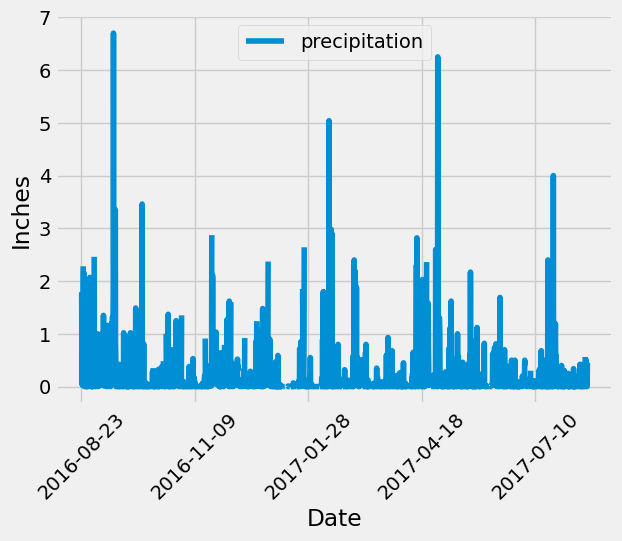

In [12]:
# Calculate the date 365 days from the last date in the data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

# Save to dataframe and name columns
df = pd.DataFrame(results, columns=['date', 'precipitation'])

# Sort by date
df = df.sort_values("date")

# Plot with Matplotlib
df.plot(x='date', y='precipitation', rot=45)
plt.xlabel("Date")
plt.ylabel("Inches")

In [13]:
# Extract summary statistics for precipitation
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [14]:
# Count number of stations
session.query(func.count(Station.station)).all()

[(9,)]

In [15]:
# Sort stations by activity level
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Calculate lowest, highest, and average temperature based on most active station.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

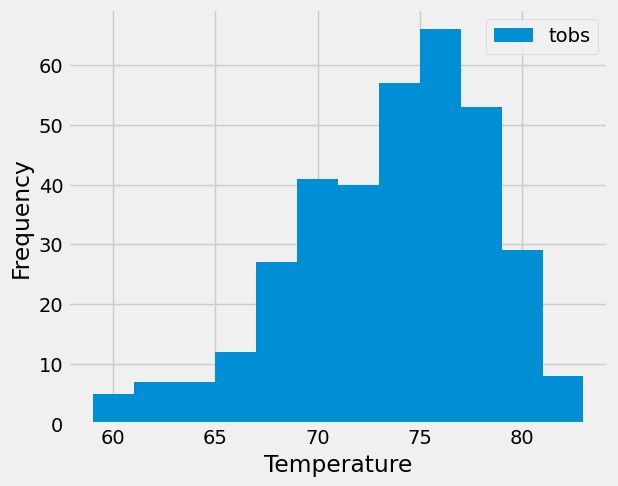

In [17]:
# Last 12 months of temperature for the most active station
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Temperature")

In [18]:
# Close session
session.close()